#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [20]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [21]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [22]:
#1- Basic Data Exploration
num_rows, num_columns = df.shape
data_types = df.dtypes
missing_values = df.isnull().sum()

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)
print("Data Types:\n", data_types)
print("Missing Values:\n", missing_values)


Number of Rows: 148654
Number of Columns: 13
Data Types:
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Missing Values:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [23]:
# Descriptive Statistics for 'TotalPay' column
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
range_salary = max_salary - min_salary
std_deviation = df['TotalPay'].std()

print(mean_salary, median_salary, mode_salary, min_salary, max_salary, range_salary, std_deviation)



74768.32197169267 71426.60999999999 0.0 -618.13 567595.43 568213.56 50517.00527394987


In [24]:
#3
for column in ['BasePay', 'OvertimePay', 'OtherPay']:
    df[column].fillna(df[column].mean(), inplace=True)
    


In [25]:
# Dropping columns with all missing values
df.drop(columns=['Notes', 'Status'], inplace=True)
#Reason>> each column has null values in all entries

Data Exploration

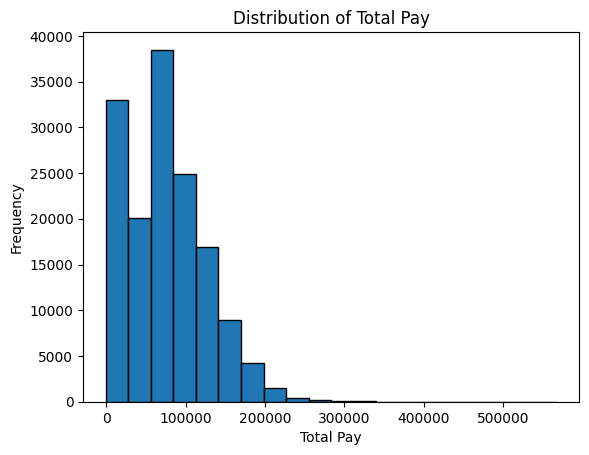

In [29]:

# Histogram for 'TotalPay'
plt.hist(df['TotalPay'], bins=20, edgecolor='black')
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()


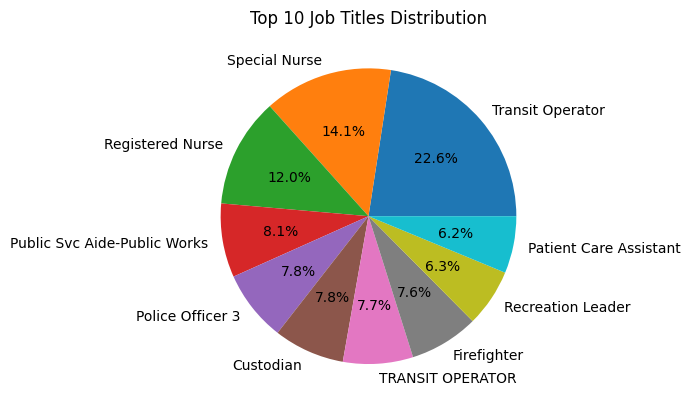

In [30]:

# Pie chart for top 10 job titles
top_job_titles = df['JobTitle'].value_counts().head(10)
plt.pie(top_job_titles, labels=top_job_titles.index, autopct='%1.1f%%')
plt.title('Top 10 Job Titles Distribution')
plt.show()


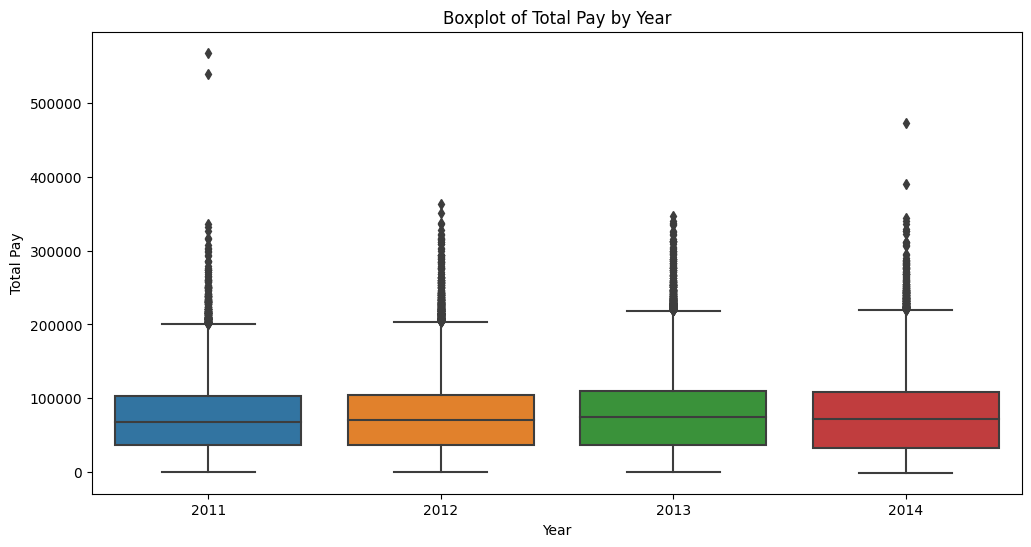

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Salaries by Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='TotalPay', data=df)
plt.title('Boxplot of Total Pay by Year')
plt.xlabel('Year')
plt.ylabel('Total Pay')
plt.show()


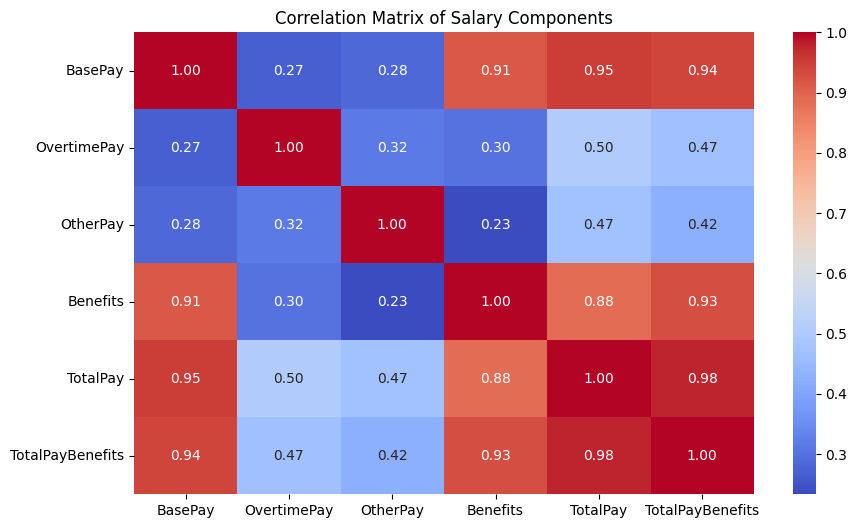

In [33]:
# Heatmap of Correlation Matrix
correlation_matrix = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Salary Components')
plt.show()


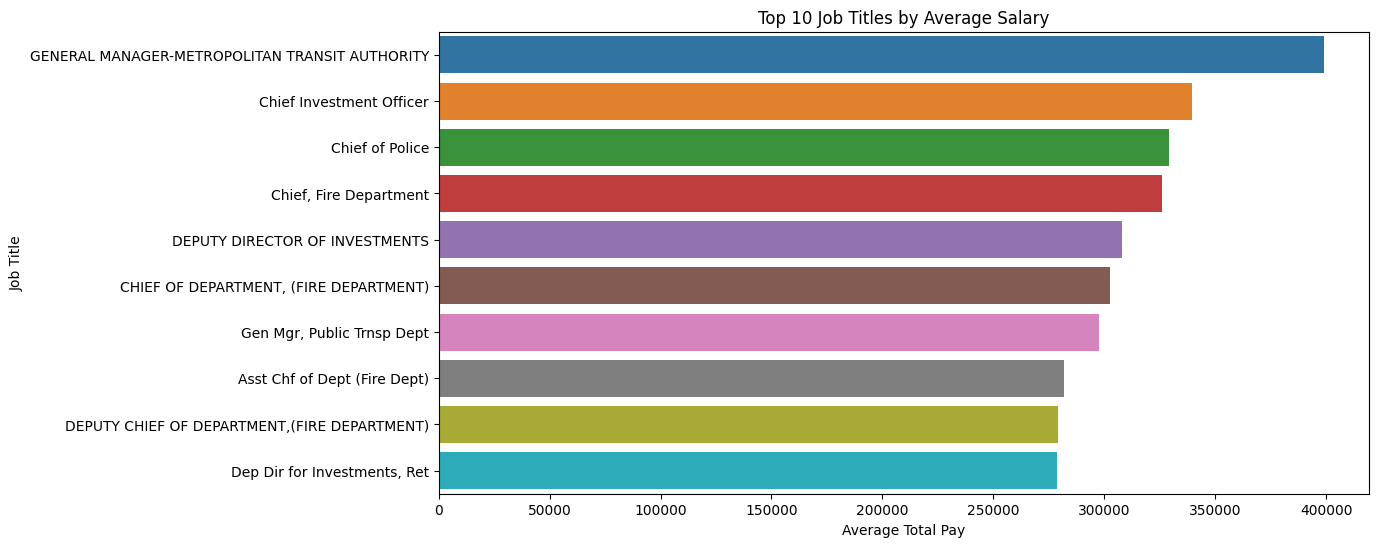

In [34]:
# Bar Chart of Average Salaries by Job Title
top_job_titles_avg_salary = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_job_titles_avg_salary.values, y=top_job_titles_avg_salary.index)
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Total Pay')
plt.ylabel('Job Title')
plt.show()


In [35]:
# Grouping by 'Year' and calculating average salary
grouped_data = df.groupby('Year')['TotalPay'].mean().reset_index()
print(grouped_data)


   Year      TotalPay
0  2011  71744.103871
1  2012  74113.262265
2  2013  77611.443142
3  2014  75463.918140


Correlation: 0.9505142922626444


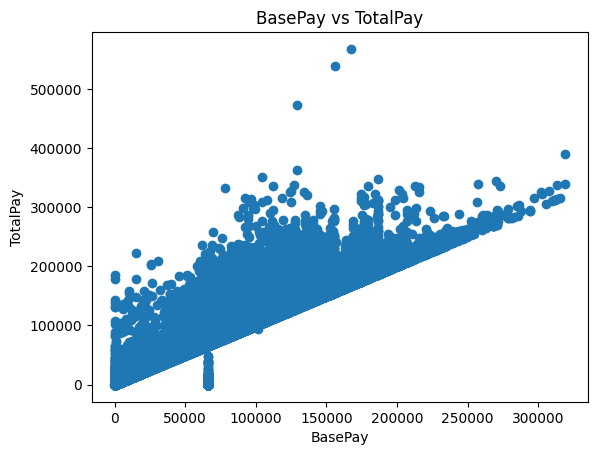

In [36]:
# Correlation analysIS
correlation = df['TotalPay'].corr(df['BasePay'])
print("Correlation:", correlation)

# Scatter plot
plt.scatter(df['BasePay'], df['TotalPay'])
plt.title('BasePay vs TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()


Summary

In [ ]:
#The data suggests a complex salary structure within the organization, with a wide range of pay scales.
#The analysis underscores the need for careful data management, particularly in maintaining complete and accurate records.
These insights can inform organizational reviews of compensation strategies, equality in pay, and financial planning.